# Lab 4: Basic regression - Predict fuel efficiency



## Imports

In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # we use this library to load the dataset
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Load data

In [216]:
# Load the 'mpg' dataset using seaborn library into a Pandas DataFrame
df = sns.load_dataset('mpg')

MPG dataset can be viewed online at  
https://github.com/mwaskom/seaborn-data/blob/master/mpg.csv

## Data Exploration - Pandas Review

### Show the first 5 rows of the dataset

In [217]:
#your code here
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


### Show the size of the dataframe

In [218]:
#your code here
df.shape

(398, 9)

### Find the columns name and their types (numerical or categorical)

In [219]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [220]:
#your code here
df.dtypes

,0
mpg,float64
cylinders,int64
displacement,float64
horsepower,float64
weight,int64
acceleration,float64
model_year,int64
origin,object
name,object


### Find the number of missing values in each column

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [222]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [223]:
#your code here

df.isna().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model_year,0
origin,0
name,0


### Handle the missing values in the dataframe

Since the number of missing values is low, we can simply drop the rows containing them. However, as a practice and review, let's substitute the missing values in the numerical columns (if any) with the mean of the respective column and the missing values in the categorical columns (if any) with the median of the respective column.

In [224]:
#your solution here

df_clean = df.copy()

num_cols = df_clean.select_dtypes(include=[np.number]).columns
cat_cols = df_clean.select_dtypes(exclude=[np.number]).columns

# numeric -> mean
for col in num_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mean())

# categorical -> mode
for col in cat_cols:
    if df_clean[col].isna().any():
        df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

df = df_clean
df.isna().sum()


,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model_year,0
origin,0
name,0


### Compute the average and the median weight

In [225]:
#your code here

avg_weight = df["weight"].mean()
median_weight = df["weight"].median()

print("Average weight:", avg_weight)
print("Median weight:", median_weight)

Average weight: 2970.424623115578
Median weight: 2803.5


### Find the number of cars that weight more than 2000 kgs

In [226]:
#your code here

count_over_2000 = (df["weight"] > 2000).sum()
count_over_2000

np.int64(354)

### Find how many cars there are for each number of cylinders

In [227]:
#your code here

df["cylinders"].value_counts()

,count
cylinders,
4,204
8,103
6,84
3,4
5,3


### Find what are the car models with number of cylinders (3 or 5)

In [228]:
#your code here

df[df["cylinders"].isin([3, 5])][["name", "cylinders"]]

,name,cylinders
71,mazda rx2 coupe,3
111,maxda rx3,3
243,mazda rx-4,3
274,audi 5000,5
297,mercedes benz 300d,5
327,audi 5000s (diesel),5
334,mazda rx-7 gs,3


### Show the `value_counts()` of `origin` column or show the unique values of this column.

In [229]:
#your code here

df["origin"].value_counts()

,count
origin,
usa,249
japan,79
europe,70


## Data Preprocessing

### Use one hot encoding to change the categorical values of `origin` column to numerical values.

- use `pd.get_dummies()` method to do the encoding
- Join the original DataFrame with the new dummy DataFrame with `pd.concat()` and use `axis=1` to concate in horizontal direction.

In [230]:
#your code here

df_encoded = pd.get_dummies(df, columns=["origin"], prefix="origin")
df_encoded.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,name,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,chevrolet chevelle malibu,False,False,True
1,15.0,8,350.0,165.0,3693,11.5,70,buick skylark 320,False,False,True
2,18.0,8,318.0,150.0,3436,11.0,70,plymouth satellite,False,False,True
3,16.0,8,304.0,150.0,3433,12.0,70,amc rebel sst,False,False,True
4,17.0,8,302.0,140.0,3449,10.5,70,ford torino,False,False,True


### Remove the `name` and `origin` column form the dataframe to have all numerical dataframe.

In [231]:
#your code here

df_numeric = df_encoded.drop(columns=["name", "origin_europe", "origin_japan", "origin_usa"], errors="ignore")
df_numeric.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


### Does the input needs reshaping?

```text
No reshaping needed. Keras expects 2D input: (samples, features).

In [232]:
#your code here
print("Current dataframe shape:", df_numeric.shape)

Current dataframe shape: (398, 7)


### Form features `X` and labels `y` based on the processed datafram

In [233]:
#your code here
X = df_numeric.drop(columns=["mpg"])
y = y = df_numeric["mpg"]

X.head(), y.head()

(   cylinders  displacement  horsepower  weight  acceleration  model_year
 0          8         307.0       130.0    3504          12.0          70
 1          8         350.0       165.0    3693          11.5          70
 2          8         318.0       150.0    3436          11.0          70
 3          8         304.0       150.0    3433          12.0          70
 4          8         302.0       140.0    3449          10.5          70,
 0    18.0
 1    15.0
 2    18.0
 3    16.0
 4    17.0
 Name: mpg, dtype: float64)

### Split the data into training and test sets and form `train_features`, `train_labels`, `test_features`, `test_labels`

In [234]:
from sklearn.model_selection import train_test_split
#your code here
train_features, test_features, train_labels, test_labels = train_test_split(
    X, y, test_size=0.2, random_state=42
)

train_features.shape, test_features.shape, train_labels.shape, test_labels.shape

((318, 6), (80, 6), (318,), (80,))

### For simplicity in the following steps, convert the dataset from a pandas DataFrame to a numpy array.

In [235]:
train_features = np.array(train_features)
train_labels = np.array(train_labels)
test_features = np.array(test_features)
test_labels = np.array(test_labels)

### Do some sanity check on the shape of the data before building a model

In [236]:
# your code here

print("train_features:", train_features.shape)
print("train_labels:", train_labels.shape)
print("test_features:", test_features.shape)
print("test_labels:", test_labels.shape)

print("\nExample row (train_features[0]):")
print(train_features[0])

train_features: (318, 6)
train_labels: (318,)
test_features: (80, 6)
test_labels: (80,)

Example row (train_features[0]):
[   8.  304.  150. 3433.   12.   70.]


## Normalization layer

To ensure stable training of neural networks, we typically normalize the data. This process also enhances the convergence of the gradient descent algorithm.

There is not single way to normalize the data. You can also use `scikit-learn `or `pandas` to do it. However, in this lab, we will use the normalization layer provided by tensorflow which matches the other parts of the model.

The `tf.keras.layers.Normalization` is a clean and simple way to add feature normalization into your model.

The first step is to create the layer:

In [237]:
normalizer = tf.keras.layers.Normalization(axis=-1)

Then, fit the state of the preprocessing layer to the data by calling `Normalization.adapt`.

It calculates the mean and variance of each feature, and store them in the layer

In [238]:
normalizer.adapt(train_features)

When the layer is called, it returns the input data, with each feature independently normalized.

In [239]:
first = train_features[0]
print('First example:', first)
print()
print('Normalized:', normalizer(first).numpy())

First example: [   8.  304.  150. 3433.   12.   70.]

Normalized: [[ 1.5271883   1.0901965   1.2618345   0.55282634 -1.3193338  -1.6966677 ]]


## **Approach #1:** Regression using `Linear Regression`

**You are welcome to use scikit-learn to perform linear regression on this dataset.**

However, here we aim to implement it using TensorFlow.

- As we saw in Lab Week 2, `logistic regression` is essentially a single neuron with a `sigmoid` activation function.

- Similarly, `linear regression` can be viewed as a single neuron with a `linear` activation function.

### **Step 1:** Linear regression model architecture

In [240]:
linear_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(9,)),
    normalizer,
    layers.Dense(1, activation='linear')
])

**Note:** You can define your model all at once like the cell above or you can buid the model incrementaly  (suitable for your assignment)

In [241]:
# Defining the model incrementaly (suitable for your assignment)
linear_model = tf.keras.Sequential()
linear_model.add(tf.keras.layers.Input(shape=(9,)))
linear_model.add(normalizer)
linear_model.add(layers.Dense(1, activation='linear'))

In [242]:
# There are less features after preprocessing

linear_model = tf.keras.Sequential()
linear_model.add(tf.keras.layers.Input(shape=(train_features.shape[1],)))
linear_model.add(normalizer)
linear_model.add(layers.Dense(1, activation='linear'))

### **Step 2:** Configure the model with Keras `Model.compile()`

The most important arguments to compile are the `loss` and the `optimizer`, since these define what will be optimized (`"mean_absolute_error"`) and how (using the `tf.keras.optimizers.Adam(learning_rate=0.1)`).

**arguments:**
- optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
- loss='mean_absolute_error'

In [243]:
#your code here
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss="mean_squared_error",
    metrics=["mean_absolute_error"]
)

### **Step 3:** Train the model using the `Model.fit()` for `100` epochs, and store the output in a variable named history.

In [244]:
history = linear_model.fit(train_features, train_labels, epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 623.8425 - mean_absolute_error: 23.8849
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 523.4810 - mean_absolute_error: 22.2517 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 473.9948 - mean_absolute_error: 21.3002 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 439.2603 - mean_absolute_error: 20.5374 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 391.2898 - mean_absolute_error: 19.3566 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 376.6797 - mean_absolute_error: 18.9448 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 321.2654 - mean_absolute_error: 17.5171 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 293.5422 - mean_absolute_error: 16.7064 
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 261.2085 - mean_absolute_error: 15.7126 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 235.4766 - mean_absolute_error: 14.8882 

In [245]:
history.history

{'loss': [585.7939453125,
  517.1454467773438,
  468.49542236328125,
  426.8975524902344,
  388.26580810546875,
  353.5910949707031,
  319.65203857421875,
  289.5554504394531,
  262.0742492675781,
  236.28707885742188,
  213.18089294433594,
  191.48226928710938,
  172.14759826660156,
  154.20590209960938,
  137.93995666503906,
  123.50225067138672,
  110.70682525634766,
  98.5498275756836,
  88.05554962158203,
  78.74307250976562,
  70.08177185058594,
  62.33873748779297,
  55.60963821411133,
  49.736446380615234,
  44.85548782348633,
  40.173614501953125,
  36.07692337036133,
  32.58509826660156,
  29.628976821899414,
  27.119129180908203,
  24.777423858642578,
  22.817914962768555,
  21.217754364013672,
  19.839128494262695,
  18.636669158935547,
  17.644954681396484,
  16.736751556396484,
  16.003681182861328,
  15.430656433105469,
  14.908897399902344,
  14.48912239074707,
  14.105683326721191,
  13.909124374389648,
  13.583864212036133,
  13.37935733795166,
  13.219568252563477,
 

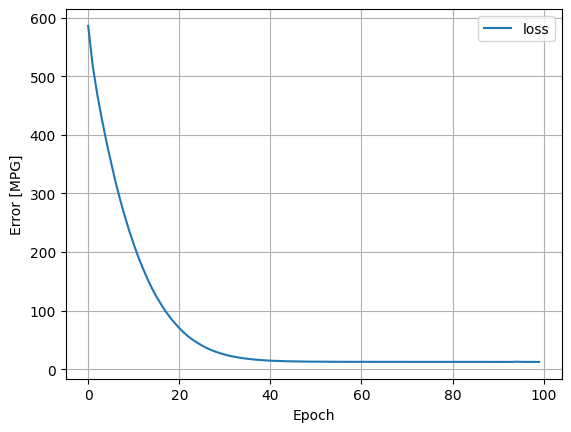

In [246]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

### Get the model summary

In [247]:
linear_model.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_5 (Normalization) │ (None, 6)              │            13 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36 (152.00 B)

 Trainable params: 7 (28.00 B)

 Non-trainable params: 13 (56.00 B)

 Optimizer params: 16 (68.00 B)

### **Step 4:** Evaluate the linear model on the test set using Keras `Model.evaluate()` and see the `mean_absolute_error` and save the result for future comparison.

In [248]:
#your code here

linear_test_results = linear_model.evaluate(test_features, test_labels, verbose=1)
linear_mae = linear_test_results[1]

print("Linear model MAE:", linear_mae)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 10.6402 - mean_absolute_error: 2.5828
Linear model MAE: 2.4952425956726074


## **Approach #2:** Regression using a `Deep Neural Network (DNN)`

### Solve the same problem and using deep neural network with the sample architecture;
- 1st hidden layer no. of units =  64
- 2nd hidden layer no. of units = 64
- Choose appropriate `activation` functions for hidden and output layers

In [249]:
#your code here

model_dnn = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(train_features.shape[1],)),
    normalizer,
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="linear")
])

model_dnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss="mean_absolute_error"
)

history_dnn = model_dnn.fit(train_features, train_labels, epochs=100, verbose=0)

dnn_results = model_dnn.evaluate(test_features, test_labels, verbose=1)
dnn_mae = dnn_results

print("DNN Test MAE:", dnn_mae)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 1.6760
DNN Test MAE: 1.6977579593658447


### Print the model summary (after training). How many parameters are there in the model?

In [250]:
#your code here

model_dnn.summary()
print("Total parameters:", model_dnn.count_params())

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_5 (Normalization) │ (None, 6)              │            13 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,034 (54.83 KB)

 Trainable params: 4,673 (18.25 KB)

 Non-trainable params: 13 (56.00 B)

 Optimizer params: 9,348 (36.52 KB)

Total parameters: 4686


## Compare the evaluation result of the two approaches, i.e., linear regression and deep neural network.

In [251]:
#your code here


print("Linear Regression Test MAE:", linear_mae)
print("DNN Test MAE:", dnn_mae)

if dnn_mae < linear_mae:
    print("DNN performs better (lower MAE).")
else:
    print("Linear regression performs better (lower MAE).")

Linear Regression Test MAE: 2.4952425956726074
DNN Test MAE: 1.6977579593658447
DNN performs better (lower MAE).


## Use the following large model and evaluate it on the test set.

In [252]:
model_dnn_large = tf.keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='linear')
])


In [253]:
# your code here

model_dnn_large.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss="mean_absolute_error"
)

history_large = model_dnn_large.fit(train_features, train_labels, epochs=100, verbose=0)

large_result = model_dnn_large.evaluate(test_features, test_labels, verbose=1)
large_mae = large_result

print("Large DNN Test MAE:", large_mae)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - loss: 1.7670
Large DNN Test MAE: 1.7113888263702393


In [254]:
model_dnn_large.summary()
print("Total parameters:", model_dnn_large.count_params())

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_5 (Normalization) │ (None, 6)              │            13 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,994 (152.33 KB)

 Trainable params: 12,993 (50.75 KB)

 Non-trainable params: 13 (56.00 B)

 Optimizer params: 25,988 (101.52 KB)

Total parameters: 13006


### Explain your observation. Why do you think the large model is not performing well?

- hint: when the number of trainable parameters is very large (even larger than the number of data points), the model may overfit the training data. One way to solve this problem is to use more data.



```text
The large model performs worse because it is too complex for this dataset.
It has many parameters, but the dataset is relatively small, so the model
starts to overfit.
Instead of learning general patterns, it learns noise from the training data,
which hurts its performance on new (test) data.
Using more data or a simpler model would help.
```

Linear  - Train MAE: 2.704521894454956  Test MAE: 2.4952425956726074
DNN     - Train MAE: 1.756699800491333  Test MAE: 1.6977579593658447
Large   - Train MAE: 1.408876657485962  Test MAE: 1.7113888263702393


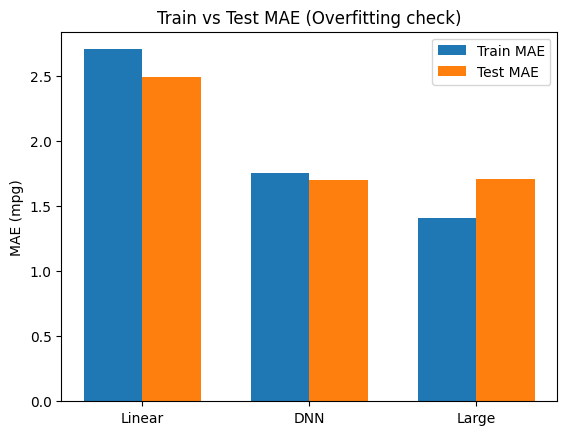

In [255]:
def get_mae(eval_result):
    if isinstance(eval_result, (float, np.floating)):
        return float(eval_result)
    return float(eval_result[-1])

# Evaluate on TRAIN
linear_train_raw = linear_model.evaluate(train_features, train_labels, verbose=0)
dnn_train_raw    = model_dnn.evaluate(train_features, train_labels, verbose=0)
large_train_raw  = model_dnn_large.evaluate(train_features, train_labels, verbose=0)

# Evaluate on TEST
linear_test_raw = linear_model.evaluate(test_features, test_labels, verbose=0)
dnn_test_raw    = model_dnn.evaluate(test_features, test_labels, verbose=0)
large_test_raw  = model_dnn_large.evaluate(test_features, test_labels, verbose=0)

# Extract MAE
linear_train_mae = get_mae(linear_train_raw)
dnn_train_mae    = get_mae(dnn_train_raw)
large_train_mae  = get_mae(large_train_raw)

linear_test_mae = get_mae(linear_test_raw)
dnn_test_mae    = get_mae(dnn_test_raw)
large_test_mae  = get_mae(large_test_raw)

print("Linear  - Train MAE:", linear_train_mae, " Test MAE:", linear_test_mae)
print("DNN     - Train MAE:", dnn_train_mae,    " Test MAE:", dnn_test_mae)
print("Large   - Train MAE:", large_train_mae,  " Test MAE:", large_test_mae)

# Bar chart
models = ["Linear", "DNN", "Large"]
train_mae = [linear_train_mae, dnn_train_mae, large_train_mae]
test_mae  = [linear_test_mae,  dnn_test_mae,  large_test_mae]

x = np.arange(len(models))
width = 0.35

plt.figure()
plt.bar(x - width/2, train_mae, width, label="Train MAE")
plt.bar(x + width/2, test_mae,  width, label="Test MAE")
plt.xticks(x, models)
plt.ylabel("MAE (mpg)")
plt.title("Train vs Test MAE (Overfitting check)")
plt.legend()
plt.show()


```text

The large model shows clear signs of overfitting: its training MAE is lower
than the test MAE, while the smaller DNN achieves similar performance on both
sets, indicating better generalization.
